# Notebook #4: Estandización

In [163]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import pickle
from collections import Counter


# Feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import RobustScaler, MinMaxScaler, Normalizer, StandardScaler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split


# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_scaling as ss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- Como primer paso, cargaremos los datos.

In [164]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo3/df_sinoutliers.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392
1,31,1,0.2576271186440678,0.1552734375,10,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,41890,0.0,23,0.14913657770800628,6.0,0.1727447216890595,5,1,4,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413
2,32,0,0.2576271186440678,0.1552734375,17,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,193280,1.0,15,0.16666666666666666,5.0,0.17264957264957265,5,0,3,0.1461794019933555,0.16326530612244897,0.3253012048192771,0.15301724137931033,0.1568627450980392
3,38,0,0.0759493670886076,0.1552734375,2,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,83210,3.0,11,0.16666666666666666,13.0,0.1328125,8,7,5,0.13390928725701945,0.11270491803278689,0.139186295503212,0.15736040609137056,0.1568627450980392
4,32,0,0.14581458145814583,0.1552734375,10,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.16714697406340057,0.2606060606060606,23420,4.0,12,0.1696969696969697,9.0,0.17264957264957265,6,0,4,0.13390928725701945,0.2292358803986711,0.139186295503212,0.15301724137931033,0.1568627450980392


- Separamos las columnas a las que se va a aplicar la estandarización, que son las numéricas.

In [165]:
col_numericas = df.select_dtypes(include=np.number).columns
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Y aplicamos los 4 escaladores con los que contamos:

In [166]:
df_escaladores_graf = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [RobustScaler(), MinMaxScaler(), StandardScaler(), Normalizer()])

In [167]:
df_escaladores_graf.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_robust,DistanceFromHome_robust,MonthlyIncome_robust,NumCompaniesWorked_robust,PercentSalaryHike_robust,TotalWorkingYears_robust,YearsAtCompany_robust,YearsSinceLastPromotion_robust,YearsWithCurrManager_robust,Age_minmax,DistanceFromHome_minmax,MonthlyIncome_minmax,NumCompaniesWorked_minmax,PercentSalaryHike_minmax,TotalWorkingYears_minmax,YearsAtCompany_minmax,YearsSinceLastPromotion_minmax,YearsWithCurrManager_minmax,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard,Age_normalizer,DistanceFromHome_normalizer,MonthlyIncome_normalizer,NumCompaniesWorked_normalizer,PercentSalaryHike_normalizer,TotalWorkingYears_normalizer,YearsAtCompany_normalizer,YearsSinceLastPromotion_normalizer,YearsWithCurrManager_normalizer
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.333333,-0.083333,1.508353,-0.333333,-0.500000,-1.000000,-0.666667,-0.5,-0.6,0.785714,0.178571,0.637546,0.111111,0.000000,0.026316,0.027027,0.000000,0.000000,1.575654,-0.385343,1.415562,-0.677912,-1.152083,-1.339503,-1.012234,-0.689792,-1.154252,0.000389,0.000046,1.000000,0.000008,0.000084,0.000008,0.000008,0.000000,0.000000
1,31,1,0.2576271186440678,0.1552734375,10,0.14917127071823205,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.17532467532467533,0.2606060606060606,41890,0.0,23,0.14913657770800628,6.0,0.1727447216890595,5,1,4,0.13778705636743216,0.16326530612244897,0.1794871794871795,0.15736040609137056,0.17647058823529413,-0.333333,0.250000,-0.130531,-0.666667,1.500000,-0.444444,0.000000,0.0,0.2,0.309524,0.321429,0.167457,0.000000,0.857143,0.157895,0.135135,0.066667,0.235294,-0.636617,0.109493,-0.488418,-1.080707,2.150140,-0.673107,-0.308644,-0.360317,-0.009973,0.000740,0.000239,1.000000,0.000000,0.000549,0.000143,0.000119,0.000024,0.000095
2,32,0,0.2576271186440678,0.1552734375,17,0.15274463007159905,0.1111111111111111,0.16473072861668428,0.15315315315315314,0.16714697406340057,0.11748251748251748,193280,1.0,15,0.16666666666666666,5.0,0.17264957264957265,5,0,3,0.1461794019933555,0.16326530612244897,0.3253012048192771,0.15301724137931033,0.1568627450980392,-0.250000,0.833333,2.648798,-0.333333,0.166667,-0.555556,0.000000,-0.5,0.0,0.333333,0.571429,0.964666,0.111111,0.285714,0.131579,0.135135,0.000000,0.176471,-0.526004,0.975458,2.740478,-0.677912,-0.051342,-0.806386,-0.308644,-0.689792,-0.296043,0.000166,0.000088,1.000000,0.000005,0.000078,0.000026,0.000026,0.000000,0.000016
3,38,0,0.0759493670886076,0.1552734375,2,0.15384615384615385,0.16486902927580893,0.16473072861668428,0.14035087719298245,0.12962962962962962,0.11748251748251748,83210,3.0,11,0.16666666666666666,13.0,0.1328125,8,7,5,0.13390928725701945,0.11270491803278689,0.139186295503212,0.15736040609137056,0.1568627450980392,0.250000,-0.416667,0.628052,0.333333,-0.500000,0.333333,0.500000,3.0,0.4,0.476190,0.035714,0.385045,0.333333,0.000000,0.342105,0.216216,0.466667,0.294118,0.137678,-0.880180,0.392868,0.127677,-1.152083,0.259847,0.219049,1.616533,0.276097,0.000457,0.000024,1.000000,0.000036,0.000132,0.000156,0.000096,0.000084,0.000060
4,32,0,0.14581458145814583,0.1552734375,10,0.14917127071823205,0.1646090534979424,0.16473072861668428,0.14776632302405499,0.1671469

- Los representamos visualmente:

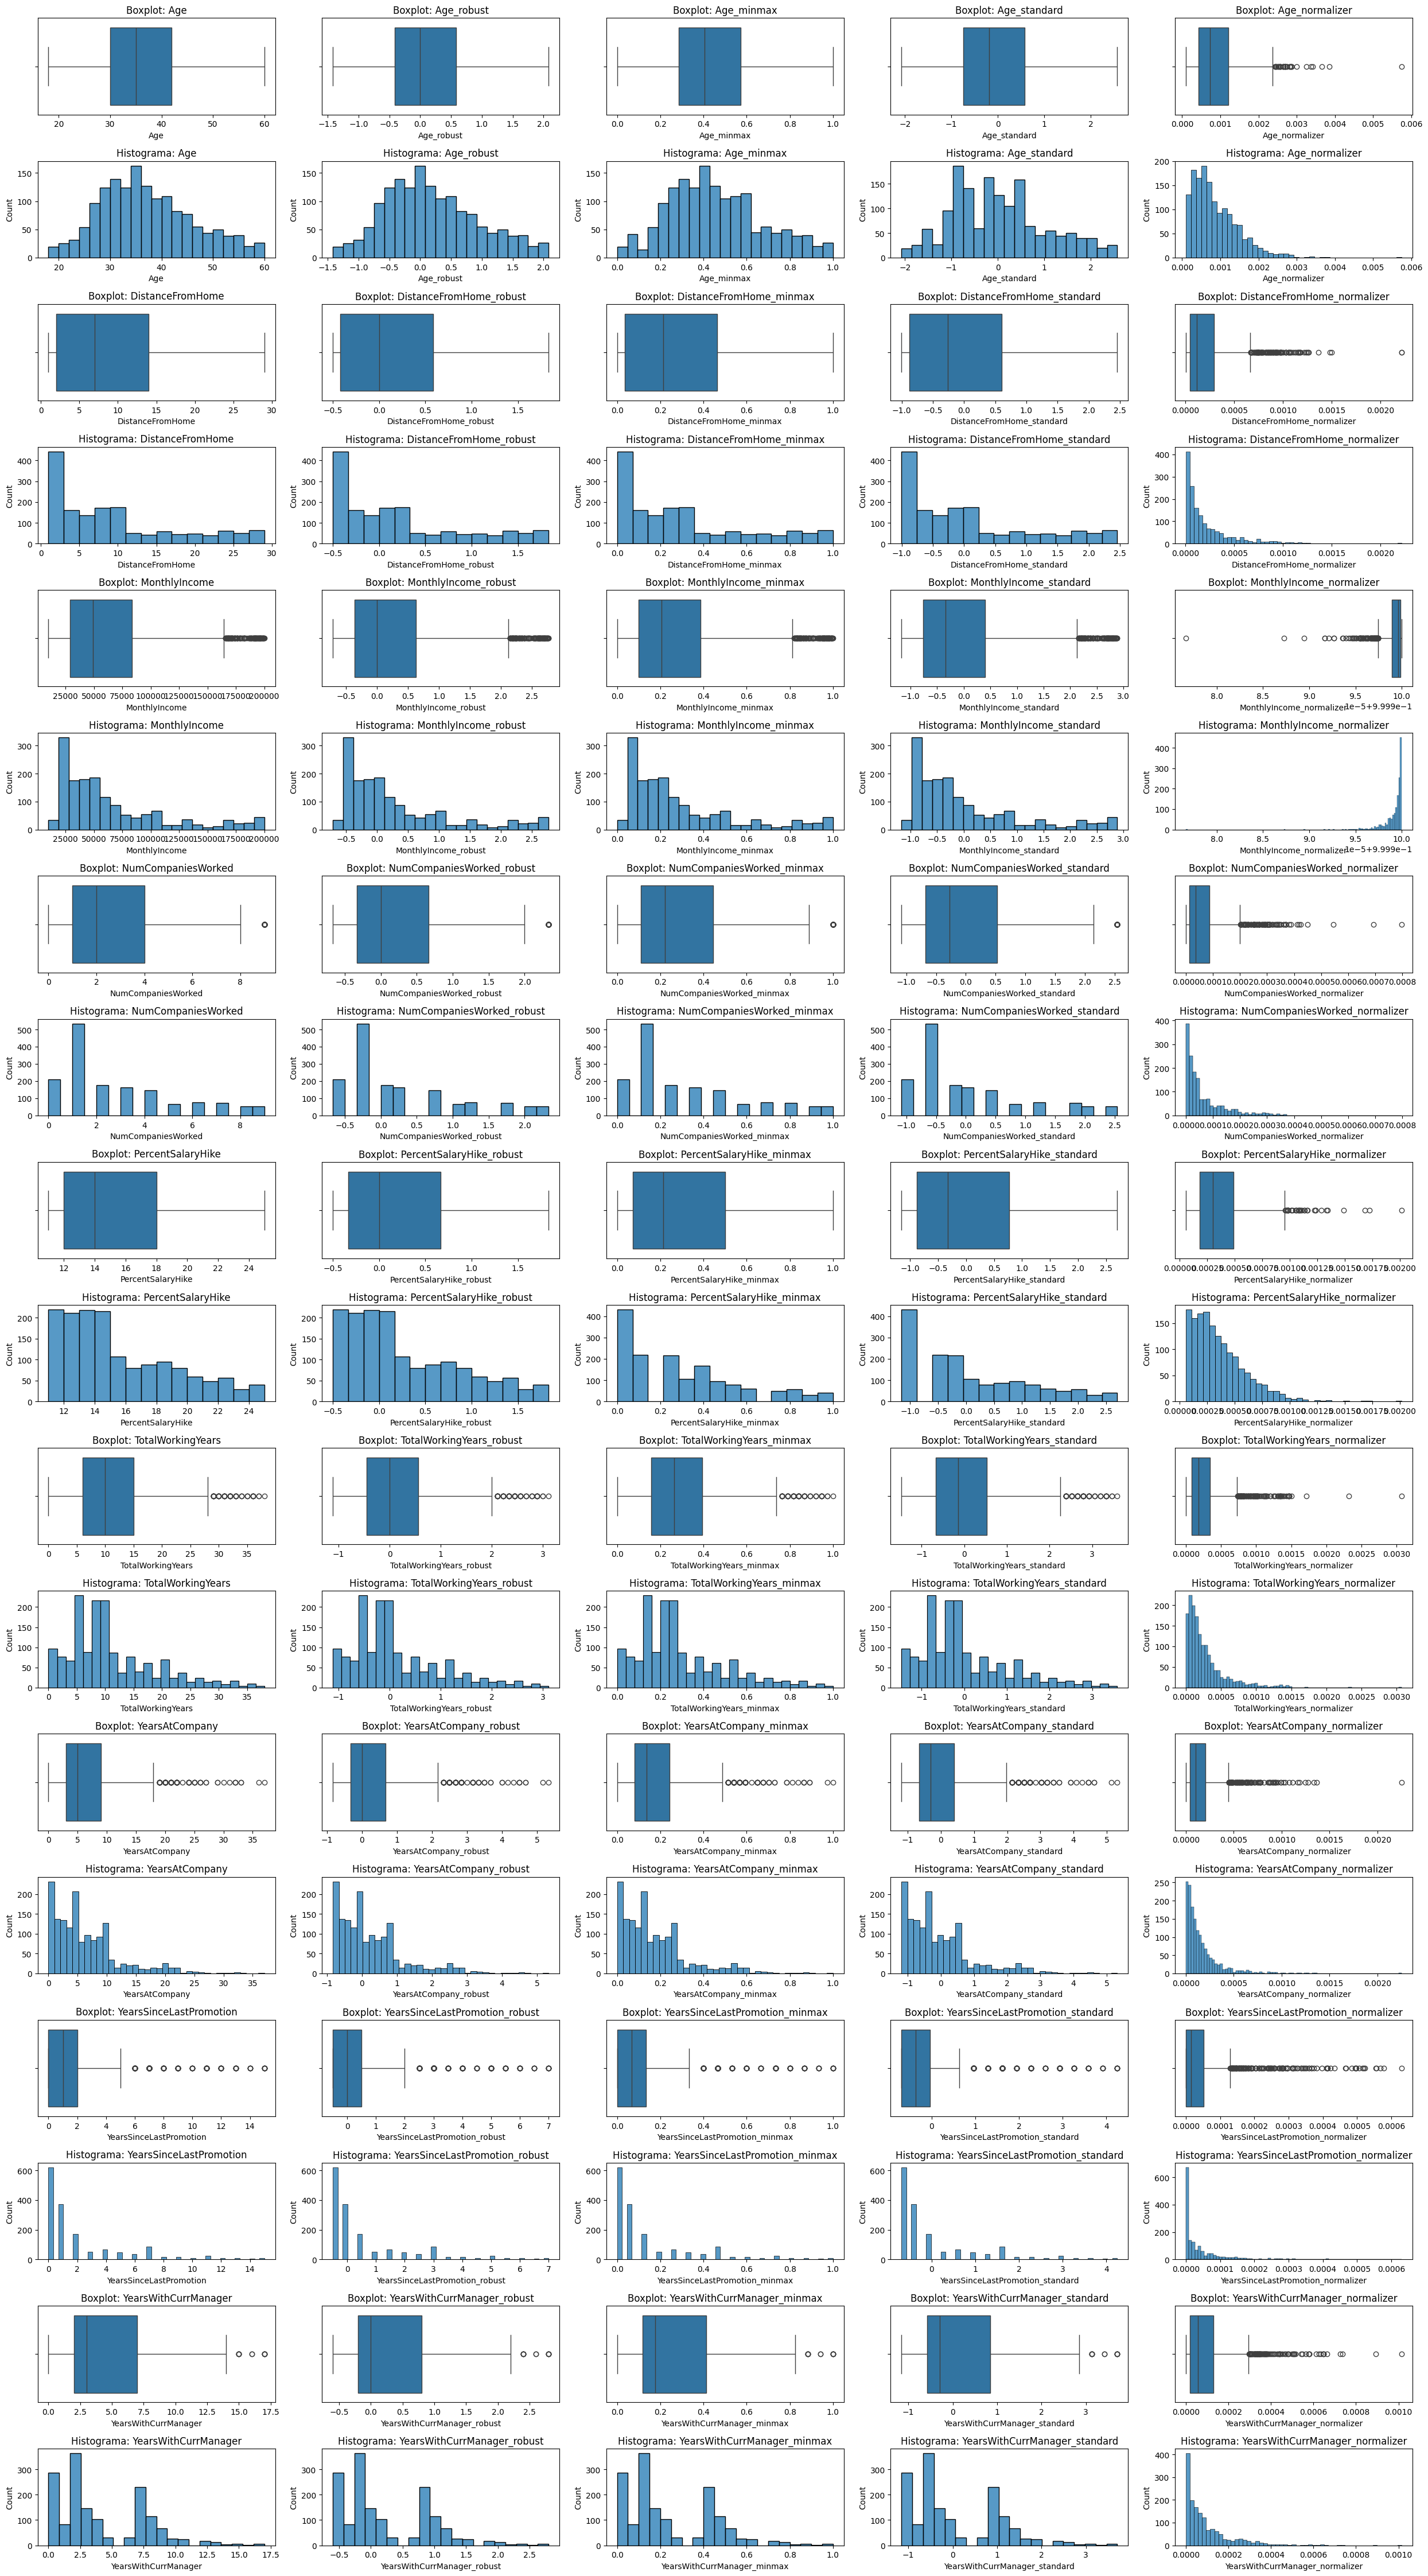

In [168]:
ss.graficar_escaladores(df_escaladores_graf, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], ['Age_robust',
       'DistanceFromHome_robust', 'MonthlyIncome_robust',
       'NumCompaniesWorked_robust', 'PercentSalaryHike_robust',
       'TotalWorkingYears_robust', 'YearsAtCompany_robust',
       'YearsSinceLastPromotion_robust', 'YearsWithCurrManager_robust',
       'Age_minmax', 'DistanceFromHome_minmax', 'MonthlyIncome_minmax',
       'NumCompaniesWorked_minmax', 'PercentSalaryHike_minmax',
       'TotalWorkingYears_minmax', 'YearsAtCompany_minmax',
       'YearsSinceLastPromotion_minmax', 'YearsWithCurrManager_minmax',
       'Age_standard', 'DistanceFromHome_standard', 'MonthlyIncome_standard',
       'NumCompaniesWorked_standard', 'PercentSalaryHike_standard',
       'TotalWorkingYears_standard', 'YearsAtCompany_standard',
       'YearsSinceLastPromotion_standard', 'YearsWithCurrManager_standard',
       'Age_normalizer', 'DistanceFromHome_normalizer',
       'MonthlyIncome_normalizer', 'NumCompaniesWorked_normalizer',
       'PercentSalaryHike_normalizer', 'TotalWorkingYears_normalizer',
       'YearsAtCompany_normalizer', 'YearsSinceLastPromotion_normalizer',
       'YearsWithCurrManager_normalizer'])

- Nos quedaremos con el StandardScaler, dado que, en las gráficas no se observan grandes diferencias y, lo que interesa en este caso es minimizar -"suavizar"- las diferencias.

In [169]:
df_standard = ss.aplicar_escaladores(df, ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], [StandardScaler()])
df_standard.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,51,0,0.14581458145814583,0.14736842105263157,6,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,131160,1.0,11,0.16666666666666666,1.0,0.057971014492753624,1,0,0,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.575654,-0.385343,1.415562,-0.677912,-1.152083,-1.339503,-1.012234,-0.689792,-1.154252


- Eliminamos las columnas originales.

In [170]:
df_standard.drop(columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], inplace=True)
df_standard.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.14581458145814583,0.14736842105263157,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.14482758620689656,0.11748251748251748,0.16666666666666666,0.057971014492753624,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.575654,-0.385343,1.415562,-0.677912,-1.152083,-1.339503,-1.012234,-0.689792,-1.154252


# Balanceo

- Como hemos visto durante el EDA, existe un desbalance significativo en la variable respuesta "Attrition", que es, en este caso, binaria. Al lanzar nuestro segundo modelo, hemos detectado que esto causa que el modelo sea incapaz de predecir correctamente cuándo se marchará un empleado de la empresa.

- Para gestionar el desbalanceo, tenemos a nuestra disposición las herramientas de la librería "imblearn", que nos ayudan a equilibrar la categoría mayoría y minoritaria a través de la creación de "hijos" basados en las características de sus vecinos con *SMOTE_NC*, y reduciendo la cantidad de datos con *TomekLink*, que identifica pares de muestras de diferentes clases que son mutuamente las más cercanas, y elimina normalmente la muestra mayoritaria.

- Como primer paso, separamos la "X" y la "y" del conjunto de datos.

In [171]:
df = df_standard
X = df.drop(columns = "Attrition")
y = df["Attrition"]

In [172]:
tomek = TomekLinks(sampling_strategy='auto', n_jobs=-1)
X_sampled, y_sampled = tomek.fit_resample(X, y)

resampled_df = pd.DataFrame(X_sampled, columns=X.columns)
resampled_df["Attrition"] = y_sampled

print(f'''Shape del DataFrame original: {df.shape}
Shape del DataFrame resampled: {resampled_df.shape}
Categoría "Attrition" original: {Counter(df["Attrition"])}
Categoría "Attrition" resampled: {Counter(resampled_df["Attrition"])}''')

Shape del DataFrame original: (1549, 25)
Shape del DataFrame resampled: (1466, 25)
Categoría "Attrition" original: Counter({'0': 1303, '1': 246})
Categoría "Attrition" resampled: Counter({'0': 1220, '1': 246})


In [173]:
df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating', 'Age_standard', 'DistanceFromHome_standard',
       'MonthlyIncome_standard', 'NumCompaniesWorked_standard',
       'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard'],
      dtype='object')

- Habiendo reducido la dimensión del desbalanceo eliminando las muestras cercanas en la categoría mayoritaria -los no-, necesitamos ahora aumentar la categoría minoritaria, los sí.

- Para ello, necesitaremos indicar a al método SMOTENC aquellas features (variables) categóricas en que no queremos que aumente el número de categorías, dado que, serían ficticias. Por ejemplo, para la columna "Gender", sólo puede existir Male y Female, pero, al estar codificada numéricamente, podría crear nuevas categorías que no podrían mapearse de vuelta a otro valor.

- Parte de los parámetros que pasar a SMOTENC es cuánto queremos que gestione el desbalanceo, a través del "sampling_strategy", cuando más cercano a uno, igualará las categorías, y creará más datos ficticios, aumentando el tamaño total del dataset.

In [174]:
lista_cat = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education',
'EducationField', 'JobLevel', 'MaritalStatus', 'StockOptionLevel', 'TrainingTimesLastYear', 'JobInvolvement',
'PerformanceRating', 'NumCompaniesWorked_standard', 'PercentSalaryHike_standard', 'TotalWorkingYears_standard',
       'YearsAtCompany_standard', 'YearsSinceLastPromotion_standard',
       'YearsWithCurrManager_standard', 'Gender']

smotenc = SMOTENC(categorical_features=lista_cat, random_state=42, k_neighbors=5, sampling_strategy=0.7) 
X_resampled, y_resampled = smotenc.fit_resample(df, y)

resampled_data = pd.DataFrame(X_resampled, columns=df.columns)
resampled_data['Attrition'] = y_resampled

resampled_data.head(1)

,Attrition,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,TrainingTimesLastYear,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Age_standard,DistanceFromHome_standard,MonthlyIncome_standard,NumCompaniesWorked_standard,PercentSalaryHike_standard,TotalWorkingYears_standard,YearsAtCompany_standard,YearsSinceLastPromotion_standard,YearsWithCurrManager_standard
0,0,0.14581458145814583,0.14736842105263157,0.18874172185430463,0.16486902927580893,0.15235008103727715,0.14776632302405499,0.144828,0.11748251748251748,0.16666666666666666,0.057971014492753624,0.13778705636743216,0.11270491803278689,0.17086834733893558,0.15301724137931033,0.1568627450980392,1.575654,-0.385343,1.415562,-0.677912,-1.152083,-1.339503,-1.012234,-0.689792,-1.154252


- Comprobamos que no se haya creado una nueva categoría para las features categóricas.

In [175]:
resampled_data["Gender"].value_counts()

Gender
0.16473072861668428    1374
0.15235008103727715     841
Name: count, dtype: int64

- En esta primera iteración, utilizamos una estrategia de 0.7, que ha cambiado el desbalanceo de un original 84-16 a 59-41% en la variable respuesta.

In [176]:
ratio_vr = resampled_data["Attrition"].value_counts(normalize=True) * 100
print(f'''Ratio de Variable Respuesta:
      {ratio_vr}''')

Ratio de Variable Respuesta:
      Attrition
0    58.826185
1    41.173815
Name: proportion, dtype: float64


- Finalmente, guardamos el DF estandarizado al que aplicaremos los modelos predictivos.

In [177]:
with open('../../datos/pickles_transformados/modelo3/df_estandarizado.pkl', 'wb') as f:
    pickle.dump(resampled_data, f)